# Abstract

El data set elegido muestra los datos de las reservas de hoteles en Portugal desde el 1 de Julio de 2015 hasta el 31 de Agosto del año 2017, incluyendo las que fueron efectivas como las cancelaciones. Dentro del mismo se especifica el tipo de hotel reservado, el cual puede ser un Hotel de ciudad o un Resort, ya que los datos corresponden a la ciudad de Lisboa y a la región de Algarve respectivamente, siendo la de Algarve la más importante del país en este rubro hotelero.

En base al análisis de los datos vamos a plantear una serie de interrogantes para determinar puntos críticos y características de la actividad. Vamos a enfocar nuestro trabajo en varios factores entre los que destacamos:

*	Origen de los huéspedes
*	Cantidad de los mismos
*	Época de mayor afluencia de personas 
*	Tipo de hotel y de habitación de preferencia
*	Porcentaje de cancelación
*	Mayor cantidad de familias, parejas o reservas individuales
*	Entre otros.

Llevando a cabo este minucioso análisis, podremos entender mejor la actividad hotelera en Portugal, como fue su desarrollo durante el periodo de tiempo analizado y así buscar soluciones para el sector proyectando futuro comportamiento del mercado.

De esta forma se podrá brindar respuestas a tiempo beneficiando a todos los actores del rubro, traduciéndose en mejor servicio para los clientes y mayores ganancias para los hoteles.

# Preguntas para el análisis

1. ¿Qué tipo de hotel es preferido por los huéspedes?

2. ¿Qué cantidad de huéspedes regresa al hotel?

3. ¿De qué países provienen la mayor cantidad de huéspedes?

4. ¿Qué tipo de habitación es preferido por los huéspedes?

5. ¿Cuál es la cantidad de huéspedes por mes?

6. ¿Cuál es el porcentaje de cancelaciones por mes?

7. ¿Cuál es la mayor temporada con niños o sin niños? 

8. ¿Cuál es la proporción de bebés, niños y adultos?

9. Porcentaje de huéspedes provenientes de Portugal por tipo de hotel.

10. ¿Cuál es el precio por huésped según el mes y el tipo de hotel? 

11. ¿Cuáles son las temporadas más altas según el tipo de huésped?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science (Coderhouse)/Entregables/Datasets/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Descripción de las Variables:
    
  1. hotel : Resort Hotel o City Hotel.

  2. is_canceled : valor que indica si la reservación fue cancelada (1) o no (0).

  3. lead_time : número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.

  4. arrival_date_year : año de llegada.

  5. arrival_date_month : mes de llegada.

  6. arrival_date_week_number : número de semana del año de llegada.

  7. arrival_date_day_of_month : día de llegada.

  8. stays_in_weekend_nights : número de noches de fin de semana (sábado o domingo) que el huésped se quedó o reservó estadía en el hotel.

  9. stays_in_week_nights : número de noches de semana (lunes a viernes) que el huésped se quedó o reservó estadía en el hotel.

  10. adults : número de adultos.

  11. children : número de niños.

  12. babies : número de bebés.

  13. meal : tipo de comida reservada.Las categorías se presentan en paquetes estándar de comidas de hospitalidad:

    * SC - sin paquete de comidas.
    * BB - alojamiento y desayuno.
    * HB - media pensión (desayuno y otra comida – normalmente cena).
    * FB - pensión completa (desayuno, comida y cena.

  14. country : país de origen.

  15. market_segment : designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".

  16. distribution_channel : Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".

  17. is_repeated_guest : valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0).

  18. previous_cancellations : número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

  19. previous_bookings_not_canceled : número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

  20. reserved_room_type : código del tipo de habitación reservado. El código se presenta en lugar de la designación por razones de anonimato.

  21. assigned_room_type : código del tipo de habitación asignado a la reserva.

  22. booking_changes : número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresa la reserva en el PMS hasta el momento del check-in o la cancelación.

  23. deposit_type : indicación de si el cliente realizó un depósito para garantizar la reserva.

  24. agent : ID de la agencia de viajes que realizó la reserva.

  25. company : ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva.

  26. days_in_waiting_list : número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.

  27. customer_type : tipo de reserva, asumiendo una de cuatro categorías:
    
    * Contract - cuando la reserva tiene asociada una asignación u otro tipo de contrato.
    * Group – cuando la reserva está asociada a un grupo.
    * Transient – cuando la reserva no es parte de un grupo o contrato, y no está asociada a otra reserva transitoria.
    * Transient-party – cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.

  28. adr : tarifa diaria promedio definida al dividir la suma de todas las transacciones de alojamiento por el número total de noches de estadía.

  29. required_car_parking_spaces : número de plazas de estacionamiento requeridas por el cliente.

  30. total_of_special_requests : número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)

  31. reservation_status : último estado de la reserva, asumiendo una de las tres categorías

    * Canceled – la reserva fue cancelada por el cliente.
    * Check-Out – el cliente se ha registrado pero ya se ha ido.
    * No-Show – el cliente no se registró e informó al hotel del motivo.

  32. reservation_status_date : Fecha en la que se estableció el último estado. Esta variable se puede usar junto con ReservationStatus para comprender cuándo se canceló la reserva o cuándo se retiró el cliente del hotel.

# Análisis exploratorio de datos (EDA)

## 1: Hotel preferido por los huéspedes

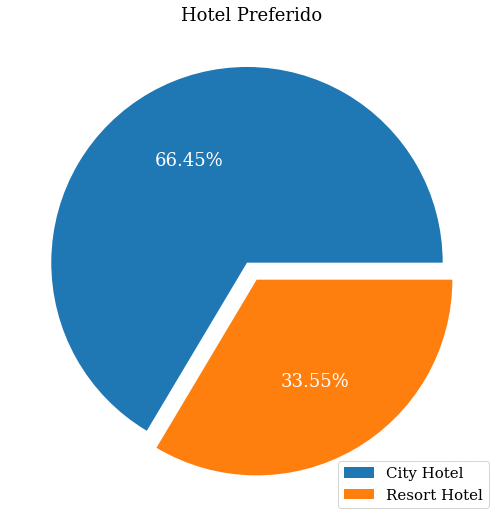

In [ ]:
data = df['hotel'].value_counts()
data.plot.pie(explode=[0.05,0.05],
              autopct='%1.2f%%',
              figsize=(10, 9), 
              fontsize=18,
              textprops={'color':'w'})
plt.title('Hotel Preferido')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()

El "City Hotel" es preferido por los huéspedes. Tiene más reservaciones.

*Recomendaciones: publicitar más la zona del Resort sobre todo para promover el turismo interno*.


## 2: Porcentaje de huéspedes repetidos

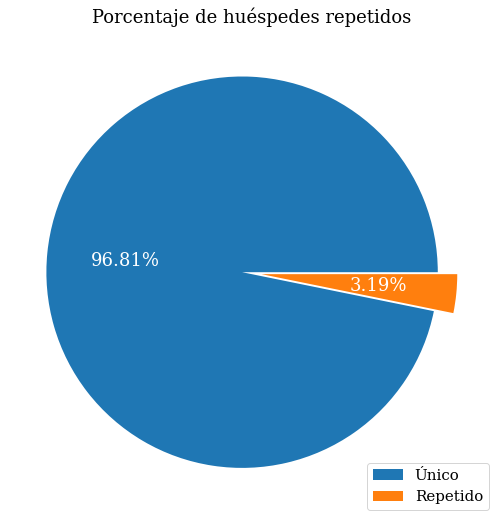

In [ ]:
r = df['is_repeated_guest'].value_counts()
r.plot.pie(explode=[0.05,0.05],
              autopct='%1.2f%%',
              figsize=(10, 9), 
              fontsize=18,
              textprops={'color':'w'})
plt.title('Porcentaje de huéspedes repetidos')
plt.ylabel('')
plt.legend(['Único','Repetido'],loc='lower right')
plt.show()

Solo el 3.19% de los huéspedes es repetido. Lo que indica una muy alta rotacion de huespedes, carececmos de informacion suficiente para saber cuál fue la causa.
si se debe a un exceso de demanda del sector, a un mal servicio, etc.

*Recomendaciones: investigar la causa raíz de este comportamiento para lograr una mayor fidelidad de los huéspedes.*

## 3: Top 10 de países de origen por número de huéspedes


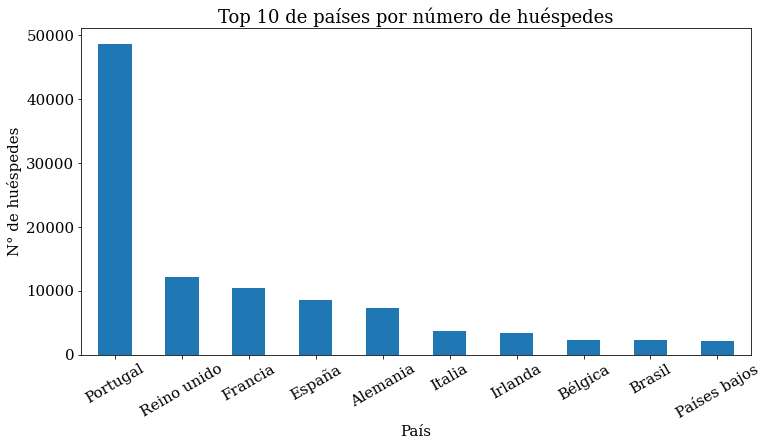

In [ ]:
df['country'].replace({"PRT": "Portugal", "GBR": "Reino unido", "FRA": "Francia", "ESP":"España", "DEU": "Alemania", "ITA": "Italia", "IRL": "Irlanda", "BEL":"Bélgica", "BRA": "Brasil", "NLD": "Países bajos"}, inplace=True)
d = df['country'].value_counts()
plt.figure(figsize=(12,6))
d[:10].plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel('País')
plt.ylabel('N° de huéspedes')
plt.title('Top 10 de países por número de huéspedes')
plt.show()

La mayoría de los huéspedes provienen de Portugal (PRT), indicando un alto porcentaje en el turismo interno, seguido por el Reino Unido (GBR) y Francia (FRA). La mayor cantidad de huéspedes proviene de Europa. 

*Recomendaciones: Analizar qué estrategias aplicar para atraer más turismo exterior.*

## 4: Tipo de habitación preferido por los huéspedes


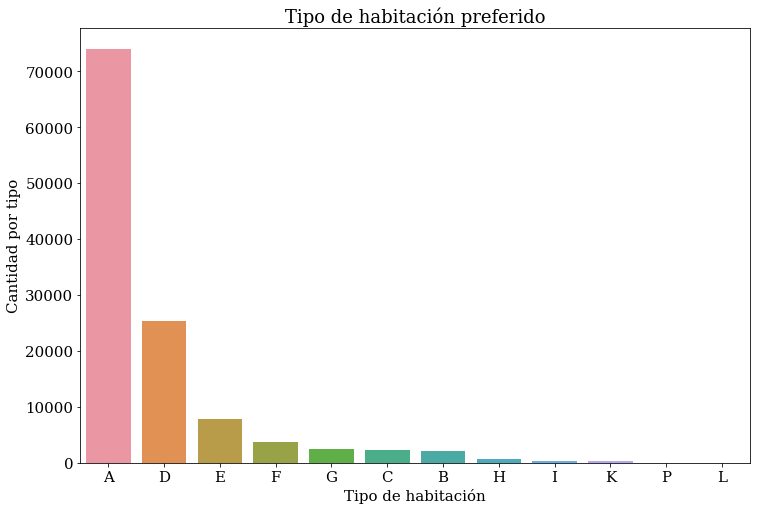

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['assigned_room_type'],
              order=df['assigned_room_type'].value_counts().index)
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad por tipo')
plt.title('Tipo de habitación preferido')
plt.show()

La habitación de tipo "A" es la más preferida por los huéspedes.

*En este caso habría que analizar qué comodidades específicas ofrece cada tipo de habitación para poder concluir por qué esta preferencia.*

## 5: Número de huéspedes por mes

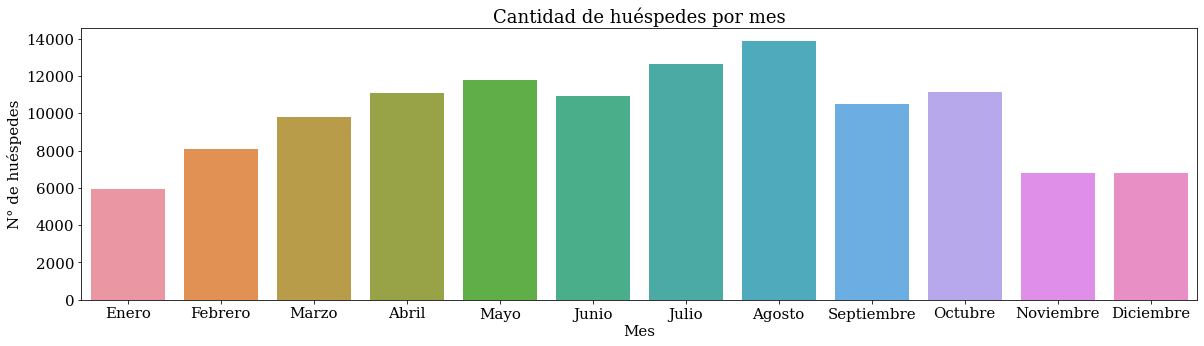

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].replace({'January':'Enero','February':'Febrero','March':'Marzo','April':'Abril','May':'Mayo','June':'Junio','July':'Julio','August':'Agosto','September':'Septiembre','October':'Octubre','November':'Noviembre','December':'Diciembre'})
plt.figure(figsize=(20,5))
sns.countplot(data=df,
              x='arrival_date_month',
              order=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
plt.xlabel('Mes')
plt.ylabel('N° de huéspedes')
plt.title('Cantidad de huéspedes por mes')
plt.show()

Los meses con mayor cantidad de huéspedes son Julio y Agosto, los cuales corresponden con el verano europeo.

*Recomendaciones: analizar cómo promocionar la estadía respescto a la estacionalidad.*

## 6: Porcentaje de cancelaciones por mes

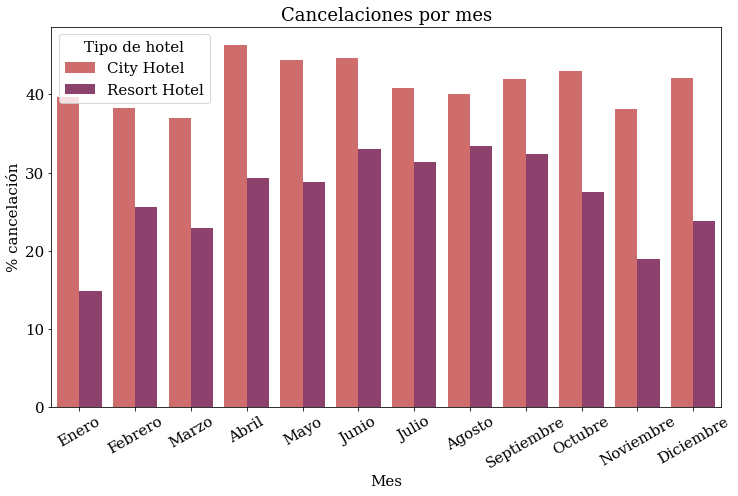

In [ ]:
d = df.groupby(['hotel','arrival_date_month'])
d = d.agg({'is_canceled':'sum', 'meal':'count'})
d = d.reset_index().rename(columns={'is_canceled':'canceled_bookings', 'meal':'total_bookings'})

d['cancelation_percentage'] = (d['canceled_bookings']/d['total_bookings'])*100

plt.figure(figsize=(12,7))
sns.barplot(x='arrival_date_month',
            y='cancelation_percentage',
            hue='hotel',
            data=d,
            palette = 'flare',
            order=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
plt.xticks(rotation=30)
plt.xlabel('Mes')
plt.ylabel('% cancelación')
plt.legend(title='Tipo de hotel')
plt.title('Cancelaciones por mes')
plt.show()

El porcentaje de cancelaciones es alto, siendo 40% apróximadamente para el "City Hotel" y de apróximadamente 30% para el "Resort Hotel".

*Recomendaciones: implentar planes de fidelidad o políticas de cancelación más escrictas.*

## 7: Mayor temporada con/sin niños

### 7.1: Mayor temporada con niños

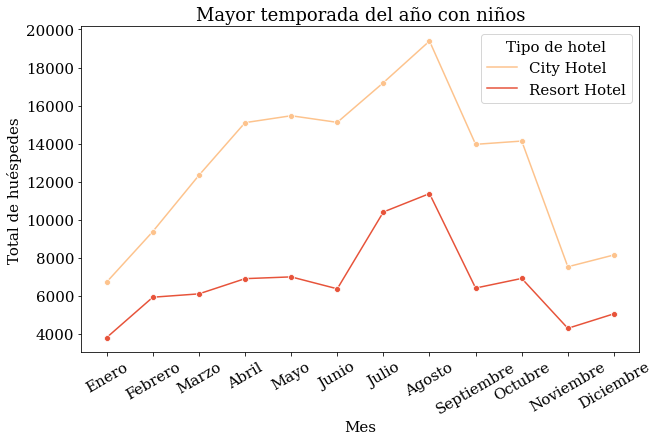

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])

n = df.pivot_table(index=['arrival_date_month','hotel'],
                   values=['total_guests'],
                   aggfunc='sum').reset_index()

sns.lineplot(x='arrival_date_month',
             y='total_guests',
             hue='hotel',
             data=n,
             palette='OrRd',
             marker = 'o')

plt.xticks(rotation=30) 
plt.title('Mayor temporada del año con niños')
plt.ylabel('Total de huéspedes')
plt.xlabel('Mes')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.legend(title='Tipo de hotel')
plt.show()

* La mayor temporada de turistas que viajan con niños es entre julio y agosto.
* Las familias tienden a viajar durante el periodo de vacaciones escolares (junio-septiembre). La estacionalidad es más pronunciada que los visitantes no familiares. 
* Enero y Noviembre son los meses con menos huéspedes en todo el año para los visitantes familiares.

*Recomendaciones: promover el turismo externo de familias de otros países en los que el fenómeno de estacionalidad es contrario (hemisferio sur).*

### 7.2: Mayor temporada sin niños

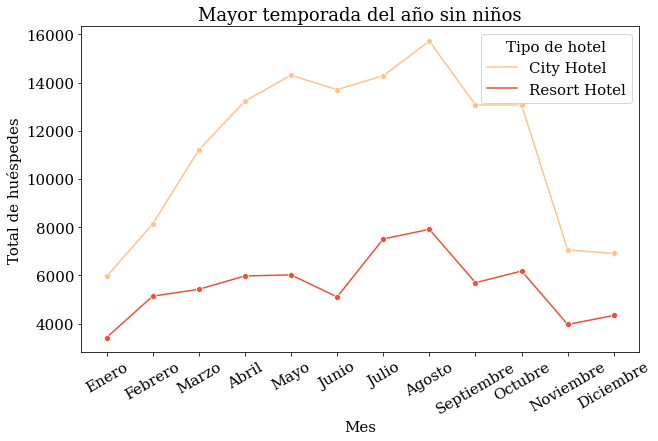

In [ ]:
df2 = df.loc[(df.children == 0) & (df.babies == 0)].copy()

df2['arrival_date_month']= pd.Categorical(df2['arrival_date_month'],['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
n2 = df2.pivot_table(index=['arrival_date_month','hotel'],
                   values=['total_guests'],
                   aggfunc='sum').reset_index()

sns.lineplot(x='arrival_date_month',
             y='total_guests',
             hue='hotel',
             data=n2,
             palette='OrRd',
             marker = 'o')

plt.xticks(rotation=30) 
plt.title('Mayor temporada del año sin niños')
plt.ylabel('Total de huéspedes')
plt.xlabel('Mes')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.legend(title='Tipo de hotel')
plt.show()

* La temporada alta para los turistas que viajan sin niños es entre julio y agosto.
* La estacionalidad es menos pronunciada respecto de los visitantes familiares.
* Enero y Noviembre son los meses con menos huéspedes en todo el año para visitantes que no viajan en familia.

*Recomendaciones: aplicar una estrategia comercial para promover la estadía de huéspedes independientemente de la estacionalidad. Investigar el motivo de viaje (placer/negocios) y focalizar en estos grupos.*

## 8: Proporción adultos, niños, bebés

### 8.1: Proporción adultos, niños, bebés (City Hotel)

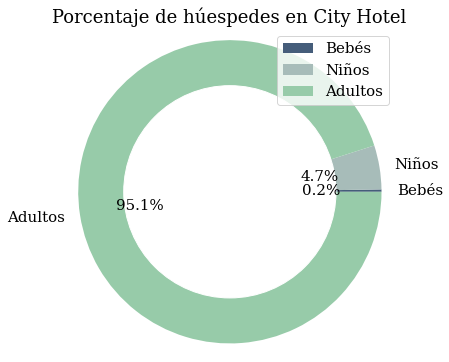

In [ ]:
labels = ['Bebés', 'Niños', 'Adultos']

def piePlot(data,title):
    
    plt.pie(data,labels=labels, autopct='%1.1f%%', colors= ['#455d7a','#a7bcb9','#97cba9'])
    plt.title(title)
    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.gca().add_artist(my_circle)
    plt.legend(labels)
    plt.rcParams['font.size'] = 15.0
    plt.rcParams['font.family'] = 'serif'
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.show()

def sum_guest_type(value):
    
    type_total = (df.loc[((df[value]>=1) & (df['hotel']=='City Hotel'))])
    type_total = type_total[value].sum()

    return type_total

total_babies_ch = sum_guest_type('babies')
total_children_ch = sum_guest_type('children')
total_adults_ch = sum_guest_type('adults')
total_guests_ch = sum_guest_type('total_guests')

def guest_type_percent(value):
    
    per_cent = round((value / total_guests_ch) * 100, 2)
    return per_cent

percent_babies_ch = guest_type_percent(total_babies_ch)
percent_children_ch = guest_type_percent(total_children_ch)
percent_adults_ch = guest_type_percent(total_adults_ch)

data1 = [percent_babies_ch, percent_children_ch, percent_adults_ch]
piePlot(data1,'Porcentaje de húespedes en City Hotel')

* La mayoría de los huéspedes son adultos (94.5%) seguido por niños (5.2%) y un porcentaje muy pequeño es de bebés con solo (0.4%).

### 8.2: Proporción adultos, niños, bebés (Resort Hotel)

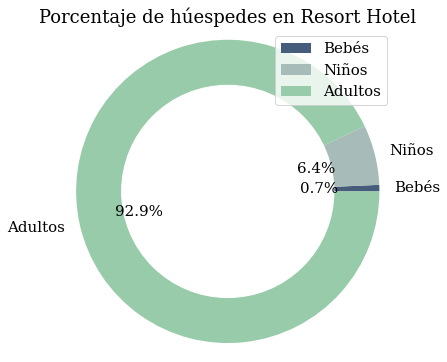

In [ ]:
def sum_guest_type(value):
    
    type_total = (df.loc[(df[value]>=1) & (df['hotel']=='Resort Hotel')])
    type_total = type_total[value].sum()
    
    return type_total

total_babies_rh = sum_guest_type('babies')
total_children_rh = sum_guest_type('children')
total_adults_rh = sum_guest_type('adults')
total_guests_rh = sum_guest_type('total_guests')

def guest_type_percent(value):
    
    per_cent = round((value / total_guests_rh) * 100, 2)
    return per_cent

percent_babies_rh = guest_type_percent(total_babies_rh)
percent_children_rh = guest_type_percent(total_children_rh)
percent_adults_rh = guest_type_percent(total_adults_rh)

data2 = [percent_babies_rh, percent_children_rh, percent_adults_rh]
piePlot(data2,'Porcentaje de húespedes en Resort Hotel')

* La mayoría de los huéspedes son adultos (93.8%) seguido por niños (5.4%) y un porcentaje muy pequeño es de bebés con solo (0.8%).

*Recomendaciones: para el hotel Resort en específico conviene analizar estrategias para incluir más a las familias y promover la estadía de grupos familiares más grandes, aprovechando las épocas con mayor alfuencia de estos grupos.*


## 9: Porcentaje de huéspedes provenientes de Portugal por tipo de hotel

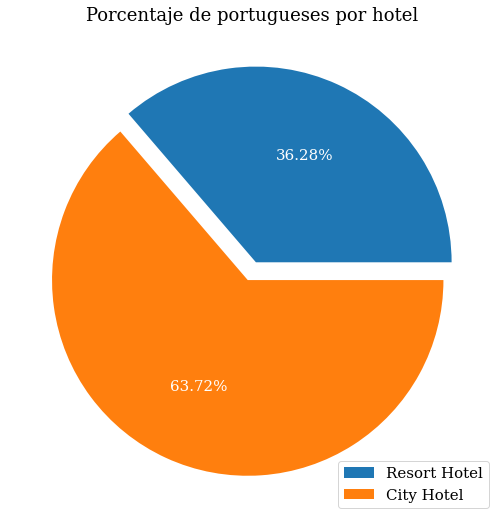

In [ ]:
rh = ((df['country'] == 'Portugal') & (df['hotel'] == 'Resort Hotel')).value_counts()[True]
ch = ((df['country'] == 'Portugal') & (df['hotel'] == 'City Hotel')).value_counts()[True]
data = [rh,ch]
plt.figure(figsize=(10,9))
plt.pie(data,
        explode=[0.05, 0.05],
        autopct='%1.2f%%',
        textprops={'color':'w'})
plt.title("Porcentaje de portugueses por hotel")
plt.legend(['Resort Hotel','City Hotel'], loc = 'lower right')
plt.show()

El porcentaje de turismo interno es mucho mayor en el City Hotel, que se encuentra en la capital del país.

*Recomendaciones: habría que analizar promover el turismo interno para las zonas de Resort, con programas de paquetes por ejemplo, o beneficios para ciudadanos del país.*

## 10: Precio por huésped según mes y tipo de hotel

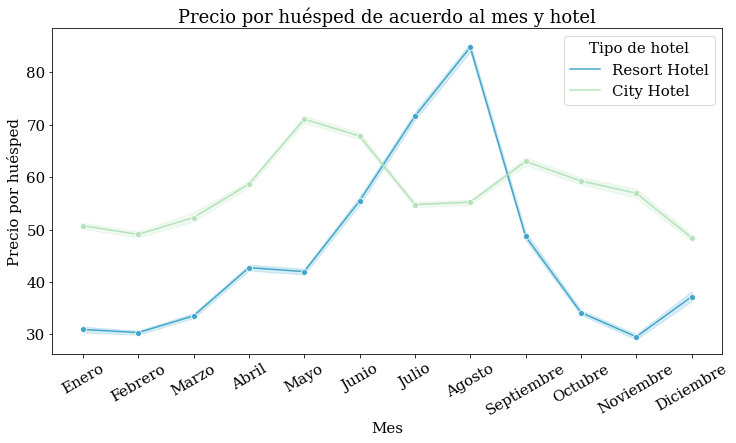

In [ ]:
df['price_per_guest'] = (df['adr']/df['total_guests'])

plt.figure(figsize = (12,6))
sns.lineplot(x = 'arrival_date_month',
             y = 'price_per_guest',
             hue = 'hotel',
             data = df,
             palette = 'GnBu_r',
             marker = 'o')
plt.xticks(rotation=30)
plt.xlabel('Mes')
plt.ylabel('Precio por huésped')
plt.legend(title = 'Tipo de hotel')
plt.title('Precio por huésped de acuerdo al mes y hotel')
plt.show()

* Hay un pico de precios para el Resort Hotel entre julio y agosto (verano).
* Hay un pico de precios para el City Hotel en mayo y mediados de septiembre.

## 11: Temporadas más altas según tipo de huésped

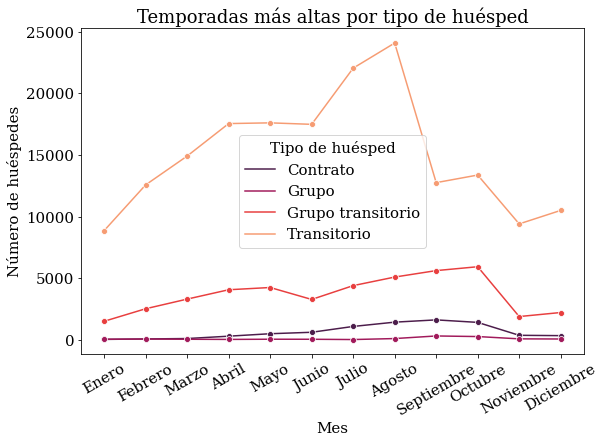

In [ ]:
df['customer_type'] = df['customer_type'].replace({'Group':'Grupo','Transient-Party':'Grupo transitorio','Contract':'Contrato','Transient':'Transitorio'})
tp = pd.crosstab(index= df['arrival_date_month'],
                  columns= df['customer_type'], 
                  values= df['total_guests'], 
                  aggfunc ='sum')

stacked = tp.stack().reset_index().rename(columns={0:'total_guests'})

p = sns.lineplot(x=stacked.arrival_date_month,
                 y=stacked.total_guests,
                 hue=stacked.customer_type,
                 palette='rocket',
                 marker = 'o')
plt.xticks(rotation=30)
plt.title('Temporadas más altas por tipo de huésped')
plt.ylabel('Número de huéspedes')
plt.xlabel('Mes')
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.legend(title='Tipo de huésped')
plt.show()

* La cantidad de huéspedes en grupos (Group) es bastante baja durante todo el año.
* Hay un pico para los huéspedes (Transient-Party) en octubre.
* Los huéspedes transitorios (Transient) presentan un pico importante entre julio y agosto.
* Los huéspedes por contrato (Contract) son bajos durante la primera mitad del año.

*Recomendaciones: en línea con lo planteado en el punto 2, habría que analizar programas de fidelidad para garantizar que los huéspedes regresen y además promocionar la estadía de grupos más grandes.*